#### World GDP

In [48]:
import pandas as pd
import seaborn as sb
import numpy as np
import missingno as msno
import autoreload
import matplotlib.pyplot as plt
import csv
import os
import sys

from collections import defaultdict, Counter

sb.set_style("darkgrid")
sb.set(font_scale=1.2)

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_row", 1000)

%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [49]:
df = pd.read_csv("D:\Open Classroom\Datasets\World GDP\gdp_csv.csv")
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [50]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [52]:
round(df.describe(), 2)

,Year,Value
count,11507.00,1.150700e+04
mean,1991.27,1.005972e+12
std,15.89,4.533056e+12
min,1960.00,8.824448e+06
25%,1978.00,2.056874e+09
50%,1993.00,1.436880e+10
75%,2005.00,1.796394e+11
max,2016.00,7.904923e+13


In [57]:
country = df.groupby(["Country Name", "Year"]).agg({"Value": "mean"}).sort_values(by = ["Country Name", "Year"], ascending = False)
country

Value
Country Name Year              
Zimbabwe     2016  1.661996e+10
             2015  1.630467e+10
             2014  1.589105e+10
             2013  1.545177e+10
             2012  1.424249e+10
...                         ...
Afghanistan  1964  8.000000e+08
             1963  7.511112e+08
             1962  5.466667e+08
             1961  5.488889e+08
             1960  5.377778e+08

[11507 rows x 1 columns]

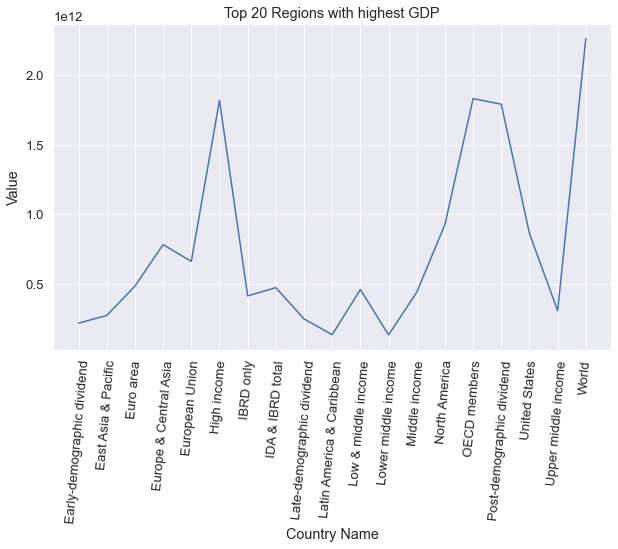

Text(0.5, 1.0, 'Top 20 Regions with highest GDP')

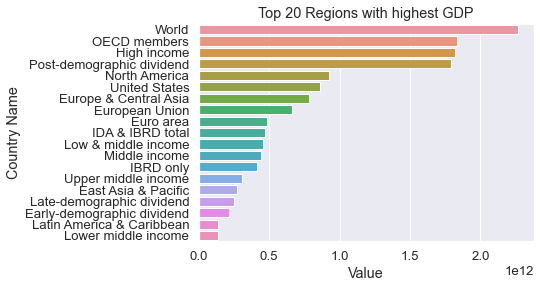

In [118]:
plt.figure(figsize = (10, 6))
year = df.groupby("Year")
get_yr = year.get_group(1967)
get_yr = get_yr.sort_values(by = "Value", ascending = False)
get_yr.head(10)
sb.lineplot(x = get_yr["Country Name"].head(19), y = get_yr["Value"].head(19), data = get_yr)
plt.xticks(rotation = 85)
plt.title("Top 20 Regions with highest GDP")
plt.show()
sb.barplot(y = get_yr["Country Name"].head(19), x = get_yr["Value"].head(19), data = get_yr)
plt.title("Top 20 Regions with highest GDP")